
[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.001 to 6.283185307179586
Input range: From -34.55751918948772 to 34.55751918948772
Generated 1000000 cartesian products in total
     Series1   Series2  Series3  Label
0 -34.557519 -3.141593    0.001    0.0
1 -33.147008 -3.141593    0.001    0.0
2 -31.736497 -3.141593    0.001    0.0
3 -30.325986 -3.141593    0.001    0.0
4 -28.915475 -3.141593    0.001    0.0


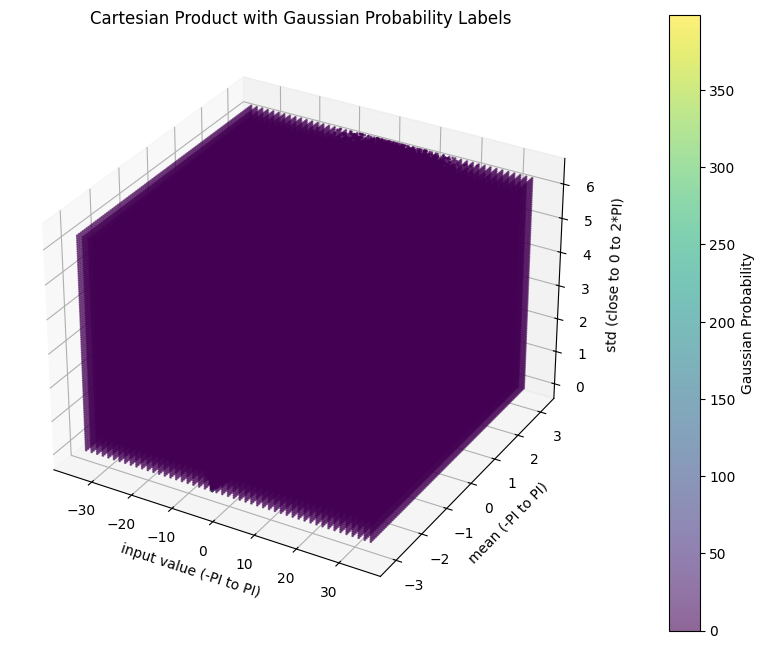

In [1]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100


# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.001
std = np.linspace(small_number, 2*np.pi, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-np.pi, np.pi, num_values)

# We add a minimum input value and maximum input value based on the smallest and highest mean and the maximum std values
min_input = mean.min() - 5 * std.max()
max_input = mean.max() + 5 * std.max()

print(f"Input range: From {min_input} to {max_input}")

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Linearly spaced values from min_input to max_input for 50% of the values
    samples = np.linspace(min_input, max_input, int(num_values * 0.5))
    
    # Add samples with a normal distribution around the mean for the remaining 50% of the values
    normal_samples = np.random.normal(m, s, int(num_values * 0.5))
    samples = np.concatenate((samples, normal_samples))
    
    inputval.extend(samples)
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [2]:
labels.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [3]:
labels.describe()

count    1.000000e+06
mean     1.539133e+00
std      2.145808e+01
min      0.000000e+00
25%      1.465837e-08
50%      3.674733e-02
75%      9.639590e-02
max      3.989422e+02
Name: Label, dtype: float64

In [4]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.93)

np.float64(0.3360094995466059)

(array([9.91773e+05, 3.25300e+03, 5.00000e+00, 1.40000e+01, 1.70000e+01,
        1.70000e+01, 1.40000e+01, 2.10000e+01, 1.20000e+01, 2.70000e+01,
        1.90000e+01, 2.20000e+01, 1.40000e+01, 1.80000e+01, 2.20000e+01,
        1.70000e+01, 2.60000e+01, 2.00000e+01, 2.20000e+01, 2.90000e+01,
        1.90000e+01, 1.70000e+01, 3.00000e+01, 1.50000e+01, 3.00000e+01,
        2.40000e+01, 2.10000e+01, 2.20000e+01, 2.50000e+01, 2.20000e+01,
        2.80000e+01, 2.00000e+01, 2.50000e+01, 3.20000e+01, 2.90000e+01,
        3.00000e+01, 3.20000e+01, 3.30000e+01, 2.70000e+01, 3.50000e+01,
        2.40000e+01, 3.50000e+01, 3.30000e+01, 3.90000e+01, 2.30000e+01,
        3.30000e+01, 2.60000e+01, 2.80000e+01, 2.90000e+01, 2.20000e+01,
        3.60000e+01, 3.00000e+01, 3.50000e+01, 2.90000e+01, 3.70000e+01,
        3.10000e+01, 3.80000e+01, 4.20000e+01, 3.60000e+01, 3.20000e+01,
        4.10000e+01, 2.70000e+01, 4.30000e+01, 4.60000e+01, 3.70000e+01,
        2.90000e+01, 4.70000e+01, 4.20000e+01, 5.40

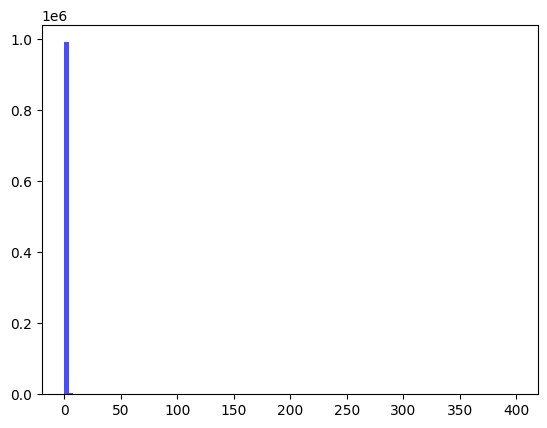

In [5]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [6]:
cartesian_df['Label'].quantile(0.9)

np.float64(0.23456363044679096)

In [7]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [8]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)

# Step 2: Save the datasets to files
output_folder = "./"
train_file = os.path.join(output_folder, "train_final_method_very_low_std.csv")
test_file = os.path.join(output_folder, "test_final_method_very_low_std.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train dataset saved to {train_file}")
print(f"Test dataset saved to {test_file}")



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Train dataset saved to ./train_final_method_very_low_std.csv
Test dataset saved to ./test_final_method_very_low_std.csv


In [9]:
# Additionally save a normalized version of the dataset
# With feature AND label normalization
from sklearn.preprocessing import StandardScaler
import pickle

# Standardize the features and labels
feature_scaler = StandardScaler()
cartesian_df_standardized = cartesian_df.copy()
cartesian_df_standardized[['Series1', 'Series2', 'Series3']] = feature_scaler.fit_transform(cartesian_df_standardized[['Series1', 'Series2', 'Series3']])

label_scaler = StandardScaler()
cartesian_df_standardized['Label'] = label_scaler.fit_transform(cartesian_df_standardized[['Label']])
cartesian_df_standardized.describe()

# Split the standardized dataset and save with scalers
train_df, test_df = train_test_split(cartesian_df_standardized, test_size=0.2, train_size=0.8, random_state=42)

# Save the datasets to files
train_file = os.path.join(output_folder, "train_final_method_very_low_std_standardized.csv")
test_file = os.path.join(output_folder, "test_final_method_very_low_std_standardized.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

# Pickle the scalers
scaler_file = os.path.join(output_folder, "scaler_final_method_very_low_std_tuple_feature_lable.pkl")
with open(scaler_file, 'wb') as f:
    pickle.dump((feature_scaler, label_scaler), f)


In [10]:
# Do the same as above with scaling the features only and log1p normalizing the lables
import pickle

# Log1p normalize the labels
cartesian_df_standardized_copy = cartesian_df_standardized.copy()
cartesian_df_standardized_copy['Label'] = np.log1p(cartesian_df['Label'])
print(cartesian_df_standardized_copy['Label'].describe())

# Split the dataset
train_df, test_df = train_test_split(cartesian_df_standardized_copy, test_size=0.2, train_size=0.8, random_state=42)

# Save the datasets to files
train_file = os.path.join(output_folder, "train_final_method_very_low_std_standardized_log1p.csv")
test_file = os.path.join(output_folder, "test_final_method_very_low_std_standardized_log1p.csv")

# pickle only the feature scaler
scaler_file = os.path.join(output_folder, "scaler_final_method_very_low_std_feature.pkl")

# Save files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

# Pickle the feature scaler
with open(scaler_file, 'wb') as f:
    pickle.dump(feature_scaler, f)


count    1.000000e+06
mean     1.154892e-01
std      4.293460e-01
min      0.000000e+00
25%      1.465837e-08
50%      3.608825e-02
75%      9.202835e-02
max      5.991320e+00
Name: Label, dtype: float64


In [11]:
train_df["Label"].describe()

count    8.000000e+05
mean     1.154188e-01
std      4.289942e-01
min      0.000000e+00
25%      1.487715e-08
50%      3.609043e-02
75%      9.200955e-02
max      5.991320e+00
Name: Label, dtype: float64

In [12]:
test_df["Label"].describe()

count    2.000000e+05
mean     1.157708e-01
std      4.307516e-01
min      0.000000e+00
25%      1.374262e-08
50%      3.607836e-02
75%      9.211521e-02
max      5.991320e+00
Name: Label, dtype: float64

In [13]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 7662
Non-outlier observations: 792338
count    7.923380e+05
mean     8.068869e-02
std      1.529888e-01
min      0.000000e+00
25%      1.086205e-08
50%      3.467355e-02
75%      8.964406e-02
max      1.402391e+00
dtype: float64


np.float64(0.034673553180015144)

In [14]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 19255
Non-outlier observations: 773083


In [15]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.730830e+05
mean     6.189274e-02
std      8.973510e-02
min      0.000000e+00
25%      4.728401e-09
50%      3.091957e-02
75%      8.437580e-02
max      5.396379e-01
dtype: float64

(array([3.18368e+05, 1.70810e+04, 1.42740e+04, 1.34140e+04, 1.34250e+04,
        1.37160e+04, 1.43380e+04, 1.48980e+04, 1.66960e+04, 1.79490e+04,
        2.13450e+04, 2.87600e+04, 2.53000e+04, 2.15550e+04, 1.84020e+04,
        1.58540e+04, 1.39490e+04, 1.24710e+04, 1.07940e+04, 9.80500e+03,
        8.93300e+03, 8.10700e+03, 7.11900e+03, 6.58300e+03, 6.06400e+03,
        5.63200e+03, 4.94700e+03, 4.62700e+03, 4.41900e+03, 4.17900e+03,
        3.68900e+03, 3.57200e+03, 3.28500e+03, 3.20600e+03, 2.92600e+03,
        2.73500e+03, 2.67200e+03, 2.52300e+03, 2.46500e+03, 2.20100e+03,
        2.01500e+03, 2.04100e+03, 1.96400e+03, 1.75100e+03, 1.87300e+03,
        1.43700e+03, 1.72500e+03, 1.42100e+03, 1.62200e+03, 1.23400e+03,
        1.54700e+03, 1.09500e+03, 1.50100e+03, 9.59000e+02, 1.06400e+03,
        1.24200e+03, 9.14000e+02, 1.15000e+03, 1.07200e+03, 7.77000e+02,
        1.03700e+03, 9.89000e+02, 7.20000e+02, 7.61000e+02, 1.10900e+03,
        5.99000e+02, 6.73000e+02, 7.77000e+02, 9.94

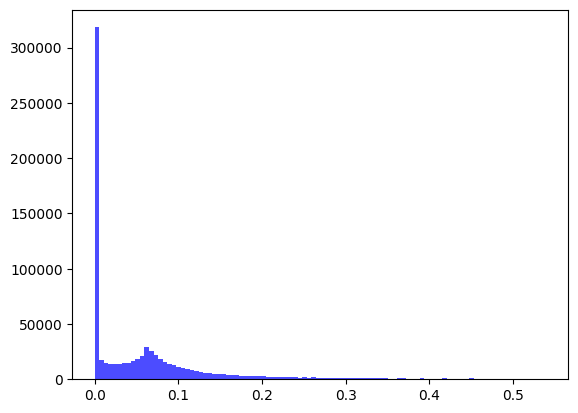

In [16]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')